In [1]:
dados_vendas = {
    'mes': ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'],
    'vendas': [2000, 2200, 2300, 2500, 2600, 2700, 2800, 2900, 3000, 3100, 3200, 3300]
}

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Objetivos
- Tratar os dados
- Formatar (se necessário)
- Treinar o modelo
- Prever a venda de dezembro
- Montar um histograma dos dados
- Montar um plot de scatter

In [8]:
VendasDF = pd.DataFrame.from_dict(dados_vendas)

In [4]:
VendasDF.head(12)

,mes,vendas
0,Janeiro,2000
1,Fevereiro,2200
2,Março,2300
3,Abril,2500
4,Maio,2600
5,Junho,2700
6,Julho,2800
7,Agosto,2900
8,Setembro,3000
9,Outubro,3100


In [5]:
# Importar bibliotecas do sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

In [9]:
d = {'Janeiro':1, 'Fevereiro':2, 'Março':3, 'Abril':4, 'Maio':5, 'Junho':6, 'Julho':7, 'Agosto':8, 'Setembro':9, 'Outubro':10, 'Novembro':11, 'Dezembro': 12 }

VendasDF.mes = VendasDF.mes.map(d)

In [10]:
VendasDF.head(12)

,mes,vendas
0,1,2000
1,2,2200
2,3,2300
3,4,2500
4,5,2600
5,6,2700
6,7,2800
7,8,2900
8,9,3000
9,10,3100


In [11]:
VendasDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   mes     12 non-null     int64
 1   vendas  12 non-null     int64
dtypes: int64(2)
memory usage: 320.0 bytes


In [12]:
X = VendasDF.drop(columns=['vendas'])
Y = VendasDF['vendas']

In [13]:
# Dividir conjunto entre treino e teste
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7, random_state=51)

In [14]:
len (Y_train)

8

In [15]:
# Treinar algoritmo de Regressão Linear - Modelo 1
model_1 = LinearRegression().fit(X_train, Y_train)

In [17]:
# Gerar Predições do conjunto de testes com base no Modelo 1
y_pred = model_1.predict(X_test)
y_pred

array([2420.        , 2876.66666667, 2305.83333333, 2762.5       ])

In [18]:
# R2 Score
model_1.score(X_train, Y_train)

0.990709949854843

In [19]:
# R2 Score 
model_1.score(X_test,Y_test)

0.9631440781440782

In [20]:
mean_absolute_error(Y_test, y_pred)

36.66666666666663

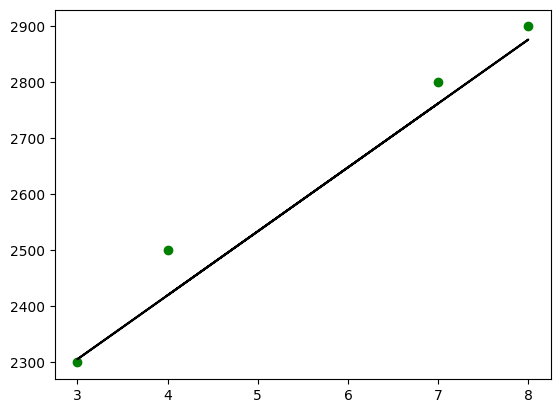

In [21]:
plt.scatter(X_test, Y_test, color='g')
plt.plot(X_test, y_pred, color = 'k')

In [23]:
# Exibir os coeficientes do modelo
print(f"Intercepto: {model_1.intercept_}")
print(f"Coeficiente: {model_1.coef_}")

Intercepto: 1963.3333333333333
Coeficiente: [114.16666667]


In [25]:
# Prever as vendas para o mês de Dezembro (mes_numero = 12)
previsao_dezembro = model_1.predict([[12]])
print(f"Previsão de vendas para Dezembro: {round(previsao_dezembro[0], 2)}")

Previsão de vendas para Dezembro: 3333.33


/home/rafnaves/.pyenv/versions/IA/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


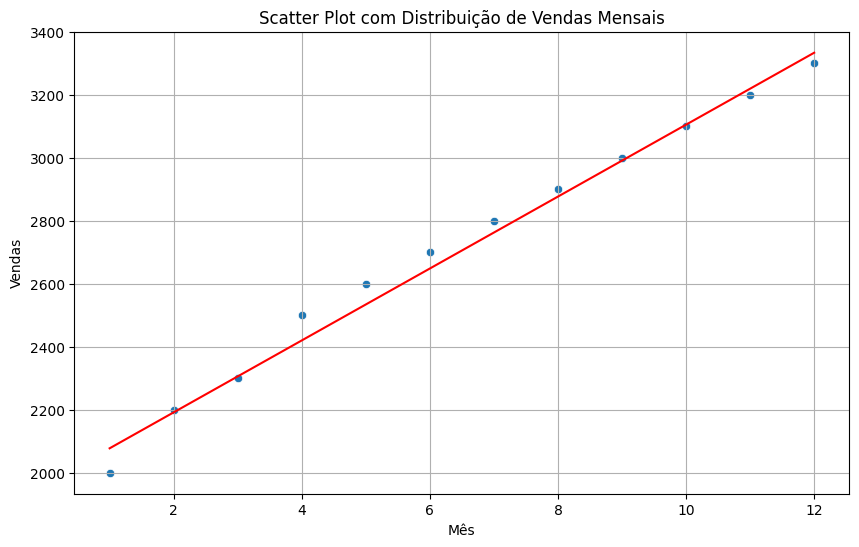

In [27]:
# Plot de Scatter com distribuição
plt.figure(figsize=(10, 6))
sns.scatterplot(x='mes', y='vendas', data=VendasDF)
plt.plot(VendasDF['mes'], model_1.predict(VendasDF[['mes']]), color='red')
plt.title('Scatter Plot com Distribuição de Vendas Mensais')
plt.xlabel('Mês')
plt.ylabel('Vendas')
plt.grid(True)
plt.show()

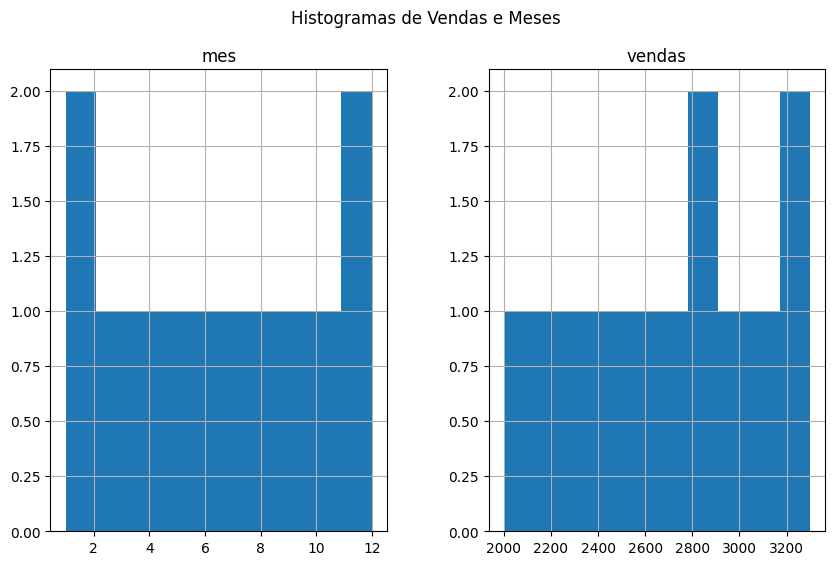

In [29]:
# Histograma de todas as variáveis
VendasDF.hist(bins=10, figsize=(10, 6), grid=True)
plt.suptitle('Histogramas de Vendas e Meses')
plt.show()